In [175]:
#Import requeired libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

Load data

In [161]:
#Create Dataframe
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Check data structure

In [163]:
#check data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [164]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [165]:
#check empty values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Data visualisation

<Axes: xlabel='YearsExperience', ylabel='Salary'>

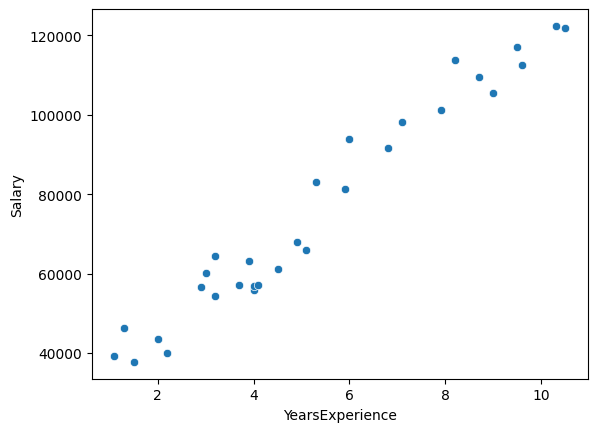

In [166]:
#visualise data
sns.scatterplot(x=df['YearsExperience'],y=df['Salary'])

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

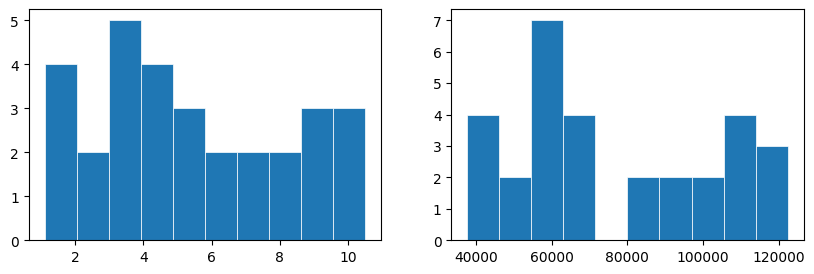

In [173]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.hist(df['YearsExperience'], bins=10, linewidth=0.5, edgecolor="white")
ax2.hist(df['Salary'],bins=10, linewidth=0.5, edgecolor="white")

Set feature and target

In [167]:
X = df["YearsExperience"].values.reshape(-1,1)
y = df["Salary"].values

Split data to train and test

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

Train the model and make predictions

In [174]:
lin = LinearRegression()
lin.fit(x_train,y_train)
pred_train = lin.predict(x_train)
pred_test = lin.predict(x_test)

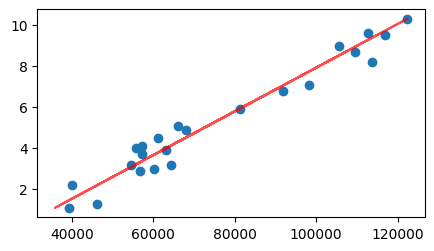

In [211]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax = plt.scatter(y_train, x_train)
ax = plt.plot(pred_train, x_train, color="red", alpha=0.7)

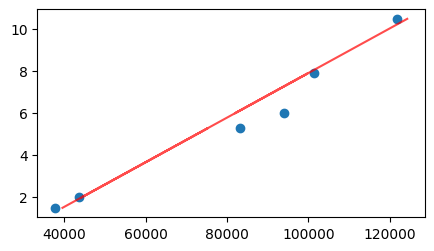

In [212]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax = plt.scatter(y_test, x_test)
ax = plt.plot(pred_test, x_test, color="red", alpha=0.7)

Count metrics

In [176]:
#Count R2 metrix for the model
print("Train R2", r2_score(y_train, pred_train)) #Train R2 0.9546988887343526
print("Test R2", r2_score(y_test, pred_test)) #Test R2 0.9608353409977045

Train R2 0.9546988887343526
Test R2 0.9608353409977045


In [177]:
#Count RMSR metrix for the model
print("Train RMSR", mean_squared_error(y_train, pred_train, squared=False)) #Train RMSR 5518.229278678266
print("Test RMSR", mean_squared_error(y_test, pred_test, squared=False)) #Test RMSR 6006.775088693294

Train RMSR 5518.229278678266
Test RMSR 6006.775088693294
